# <center> Loan Default Analysis: parcing and predictions </center>

## 1. Toeplitz Matrix (30 points)

Write a function that takes a vector of unique values {$a_{n-1}, \dots, a_{0}, \dots, a_{-(n+1)}$} and the size of the matrix as input, and outputs a generated [Toeplitz matrix](https://en.wikipedia.org/wiki/Toeplitz_matrix) based on these values. You cannot use pre-built implementations from scipy.linalg or other libraries, but you must use numpy.

Write a function that takes a matrix of size $N \times N$ as input and checks whether it is a Toeplitz matrix. The function should return a boolean value (True or False).

In [ ]:
# task number 1

import numpy as np
def Teplits(vector, size): 
    list_matrix = []
    for row in range(size):
        for i in range(len(vector) // 2 - row, len(vector) - row):
            list_matrix.append(vector[i])
    array_matrix = np.array(list_matrix)
    return array_matrix.reshape(size, size)

Teplits([1, 3, 5, 7, 9], 3)

# task number 2

def IsTeplits(array_matrix):
    schet = 0
    for i in range(array_matrix.shape[0]):
        for j in range(len(array_matrix[i])):
            try: 
                if array_matrix[i][j] == array_matrix[i + 1][j + 1]:
                    schet += 1
            except:
                pass
    if schet == array_matrix.shape[0] ** 2 - (array_matrix.shape[0] * 2 - 1):
        return(True)
    else:
        return(False)
a = np.array([[5, 7, 9], [3, 5, 7], [2, 4, 5]])
IsTeplits(a)

## 2. Ищем лучшую однушку на ЦИАНе (35 баллов)

## 2. Searching for the Best Studio Apartment on CIAN (35 points)

In this task, we will download listings for one-room apartments for sale in Moscow from [CIAN](https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p=1&region=1&room1=1) and pick the one we like the most! :3

Write a function that parses all the listings from one page and saves the link (href) to the listing with more detailed information for each of them. Apply this function to the first 10 pages, saving all hrefs in one list. If you want to gather full information and are not afraid of being banned, you can download all 54 pages.

Write a function that for each (href) listing page of the apartment downloads and saves:

**Total cost**

**Address**

**Nearest metro**

**Type of housing**

**Room area**

**Floor**

**Completion date**

Save this information in a DataFrame.

Remove unnecessary characters in the columns for the apartment price, floor, and room area, converting them to a numeric type. Set thresholds for these variables, above or below which you will consider the apartment unsuitable. For example, the price should be no more than 15 million, the floor should be no lower than 2, and the total area should be at least 40 m². You can choose other important criteria for you, but there should be at least 3 of them. Filter the DataFrame, keeping only those listings that meet the conditions. Sort the remaining listings by price in ascending order and display the top 10 final candidates. Did you like any of them? :)

In [ ]:
!pip install fake_useragent
import requests      # Библиотека для отправки запросов
import numpy as np   # Библиотека для матриц, векторов и линала
import pandas as pd  # Библиотека для табличек
import time          # Библиотека для тайм-менеджмента
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

def getPageLinks(page_number):
    page_link = 'https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p={}&region=1&room1=1'.format(page_number)
    response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})

    if not response.ok:
        return []
    else:
        html = response.content
        soup = BeautifulSoup(html,'html.parser')
        hrefs = soup.findAll('a', attrs = {'class':"_93444fe79c--link--39cNw"})
        hrefs = [link.attrs['href'] for link in hrefs]
        return hrefs
    
# вывести цену

#<span class="a10a3f92e9--price_value--1iPpd"><span itemprop="price" content="19 990 000 ₽">

def getPrice(flat_link):
    time.sleep(0.3)
    UserAgent().chrome
    response_price = requests.get(flat_link, headers={'User-Agent': UserAgent().chrome})
    if not response_price.ok:
        return []
    else:
        html_price = response_price.content
        soup_price = BeautifulSoup(html_price,'html.parser')
        try:
            obj_price = soup_price.find('span', attrs={'class':'a10a3f92e9--price_value--1iPpd'}).find('span').text
            obj_price = int(obj_price.replace('\xa0', '')[:-1])
            return obj_price
        except:
            return np.nan

# вывести адрес

#<div data-name="Geo" class="a10a3f92e9--geo--18qoo"><span itemprop="name" content="Москва, СЗАО, р-н Хорошево-Мневники, Живописная ул., 21А">

def getAddress(flat_link):
    time.sleep(0.3)
    UserAgent().chrome
    response_address = requests.get(flat_link, headers={'User-Agent': UserAgent().chrome})
    if not response_address.ok:
        return []
    else:
        html_address = response_address.content
        soup_address = BeautifulSoup(html_address,'html.parser')
        obj_address = soup_address.find('div', attrs={'class':'a10a3f92e9--geo--18qoo'})
        obj_address = np.nan if not obj_address else obj_address.find('span').attrs['content']
        return obj_address
    
# вывести ближайшее метро

#<a class="a10a3f92e9--underground_link--AzxRC" href="https://www.cian.ru/kupit-1-komnatnuyu-kvartiru-moskva-metro-shcukinskaya/" target="_blank">Щукинская</a>

def getUnderground(flat_link):
    time.sleep(0.3)
    UserAgent().chrome
    response_underground = requests.get(flat_link, headers={'User-Agent': UserAgent().chrome})
    if not response_underground.ok:
        return []
    else:
        html_underground = response_underground.content
        soup_underground = BeautifulSoup(html_underground,'html.parser')
        obj_underground = soup_underground.find('a', attrs={'class':'a10a3f92e9--underground_link--AzxRC'})
        obj_underground = np.nan if not obj_underground else obj_underground.text.strip()
        return obj_underground
    
# вывести тип жилья

#<span class="a10a3f92e9--value--3Ftu5">Вторичка</span>

def getType(flat_link):
    time.sleep(0.3)
    UserAgent().chrome
    response_type = requests.get(flat_link, headers={'User-Agent': UserAgent().chrome})
    if not response_type.ok:
        return []
    else:
        html_type = response_type.content
        soup_type = BeautifulSoup(html_type,'html.parser')
        obj_type = soup_type.find('span', attrs={'class':'a10a3f92e9--value--3Ftu5'})
        obj_type = np.nan if not obj_type else obj_type.text.strip()
        return obj_type
    
# вывести площадь комнат

# <div class="a10a3f92e9--info-value--18c8R">50&nbsp;м²</div>

def getSquare(flat_link):
    time.sleep(0.3)
    UserAgent().chrome
    response_square = requests.get(flat_link, headers={'User-Agent': UserAgent().chrome})
    if not response_square.ok:
        return []
    else:
        html_square = response_square.content
        soup_square = BeautifulSoup(html_square,'html.parser')
        try:
            obj_square = soup_square.find('div', attrs={'class':'a10a3f92e9--info-value--18c8R'}).text.split()[0]
            obj_square = np.nan if not obj_square else obj_square.replace('\xa0', '')
            return obj_square
        except:
            return np.nan

# вывести этаж

# <div itemscope="" class="a10a3f92e9--info-block--3cWJy"><div class="a10a3f92e9--info--3XiXi"><div class="a10a3f92e9--info-value--18c8R">50&nbsp;м²</div><div class="a10a3f92e9--info-title--2bXM9">Общая</div></div><div class="a10a3f92e9--info--3XiXi"><div class="a10a3f92e9--info-value--18c8R">3 из 21</div><div class="a10a3f92e9--info-title--2bXM9">Этаж</div></div><div class="a10a3f92e9--info--3XiXi"><div class="a10a3f92e9--info-value--18c8R">2018</div><div class="a10a3f92e9--info-title--2bXM9">Построен</div></div></div>
# <div class="a10a3f92e9--info-value--18c8R">3 из 21</div>

def getStorey(flat_link):
    time.sleep(0.3)
    UserAgent().chrome
    response_storey = requests.get(flat_link, headers={'User-Agent': UserAgent().chrome})
    if not response_storey.ok:
        return []
    else:
        html_storey = response_storey.content
        soup_storey = BeautifulSoup(html_storey,'html.parser')
        list_data = []
        floor_number = 0
        html_storey = response_storey.content
        soup_storey = BeautifulSoup(html_storey,'html.parser')
        obj_storeys = soup_storey.find_all('div', attrs={'class':'a10a3f92e9--info-value--18c8R'})
        obj_storey = [obj_storeys[classs].text for classs in range(len(obj_storeys))]
        if not obj_storey:
             return np.nan
        else:
            if len(obj_storey)!=0:
                for i in obj_storey:
                    if 'из' in i:
                        return i.split()[0]
        return np.nan

# вывести срок сдачи

# <div itemscope="" class="a10a3f92e9--info-block--3cWJy"><div class="a10a3f92e9--info--3XiXi">
# <div class="a10a3f92e9--info-value--18c8R">4 кв. 2020</div>

def getDealTime(flat_link):
    time.sleep(0.3)
    UserAgent().chrome
    response_deal_time = requests.get(flat_link, headers={'User-Agent': UserAgent().chrome})
    if not response_deal_time.ok:
        return []
    else:
        html_deal_time = response_deal_time.content
        soup_deal_time = BeautifulSoup(html_deal_time,'html.parser')
        obj_deal_time = soup_deal_time.find_all('div', attrs={'class':'a10a3f92e9--info-value--18c8R'})
        obj_deal_time = [obj_deal_time[classs].text for classs in range(len(obj_deal_time))]
        if not obj_deal_time:
            return np.nan
        else:
            for i in obj_deal_time:
                if 'кв' in i:
                    return i
    return np.nan

In [ ]:
final_df = pd.DataFrame(columns=['Price', 'Address', 'Underground', 'Type', 'Square', 'Storey', 'DealTime'])
for page in range(1, 11):
    for link in getPageLinks(page):
        data_row = {'Price':getPrice(link), 'Address':getAddress(link), 'Underground':getUnderground(link), 
                'Type':getType(link), 'Square':getSquare(link), 'Storey':getStorey(link), 'DealTime':getDealTime(link)}
        final_df = final_df.append(data_row, ignore_index=True)
        time.sleep(0.3)
final_df

In [ ]:
for i in range(252):
    try:
        final_df['Square'][i] = final_df['Square'][i].replace(',', '.')
    except:
         pass
    try:
        final_df['Square'][i] = final_df['Square'][i].astype(float)
    except:
        pass
    try:
        final_df['Storey'][i] = final_df['Storey'][i].astype(int)
    except:
        pass
filter_1 = final_df['Type'] == 'Новостройка'
filter_2 = final_df['Storey'] >= 5
filter_3 = final_df['Storey'] <= 12
filter_4 = final_df['Square'] >= 37
filter_5 = final_df['Square'] <= 56
df_needed = final_df.loc[filter_1 & filter_2 & filter_3 & filter_4 & filter_5]
df_needed.sort_values(by = final_df['Цена'], ascending = False, inplace=True)
df_needed

## 3. Defaults (35 points)

Given the cost of real estate in Moscow, we might have to go into debt... Let's analyze how often people default on mortgages and loans!

The file defaults.csv contains data that can be used to analyze the customer base, predict defaults, and assess credit scoring (i.e., credit risk evaluation).

Variables:

**ID** - client identifier;

**LIMIT_BAL** - loan/mortgage amount (in dollars);

**SEX** - gender (1=male, 2=female);

**EDUCATION** - education level (1=doctoral degree, 2=university, 3=high school, 4=other, 5 and 6=unknown);

**MARRIAGE** - marital status (1=married, 2=single, 3=other);

**AGE** - age (in years);

**PAY_0** - Loan payment status in September (-1 = proper payment, 1 = one month late, 2 = two months late, ... 8 = eight months late, 9 = nine or more months late). **PAY_2, PAY_3, ..., PAY_6** - for August, July, June, May, and April, respectively;

**BILL_AMT1** - bill statement amount for September (in dollars). **BILL_AMT2, BILL_AMT3, ..., BILL_AMT6** - for August, July, June, May, and April, respectively;

**PAY_AMT1** - previous payment amount for September (in dollars). **PAY_AMT1, PAY_AMT2, ..., PAY_AMT6** - for August, July, June, May, and April, respectively;

**default.payment.next.month**: whether a default occurred (1=yes, 0=no).

You need to analyze the bank dataset by completing the following tasks:

1. Load the data and convert it into a pd.DataFrame. What is the size of this dataset? Look at the first 10 rows of your data. Using random.randint() in the range of row indices, generate a random number $N$ and return the rows from the dataframe with indices from $N$ to $N + 20$.

2. Display the number of missing values in all columns.

3. Show the number of unique clients in the dataset, using at least two different methods.

4. Check if there is a gender imbalance among the clients? What is their ratio (in percentage)?

5. Create a new variable **AGE_BINS** with categories based on age (= age ranges). Plot and compare the distribution graphs of clients by the variables *AGE* and **AGE_BINS**. What age groups most often apply for credit at this bank? Is there an advantage in using the categorical variable?

6. Display the total number of clients with and without defaults. Plot a histogram with the percentage ratio of these groups. How can you assess whether the proportion of clients with a default is large?

7. Plot a histogram and a density plot of the loan amounts (**LIMIT_BAL**) for each of the groups of clients separately (with default and without), placing them on one graph. Increase the size of the graph, change the default colors.

8. Based on the graph from the previous step, answer the following questions:

* For which loan amounts do defaults most often occur?

* Based on the density distribution graphs, starting from which loan amount do clients without defaults outnumber clients with defaults?

* How can you determine from the graph if there are any approved loan amounts for which defaults never occur? Output the values a) of the loan amounts where defaults always occur, and b) of those where defaults never occur.

9. Plot the correlation matrix for all variables by the loan repayment status. Add correlation values to the graph. Is there a general trend in increasing/decreasing correlation over time (across all months)?

10. Write a function that returns a dictionary, where the key is the approved loan amount, and the value is an embedded dictionary. In it, the key ratio stores the ratio of clients with defaults to those without defaults for the given loan amount, and the key num_clients stores the total number of clients with that loan amount. Example of an element of the dictionary: {50000.0 : {'ratio': 0.357, 'num_clients': 3365}}. Sort the resulting dictionary by the ratio key in descending order. For which loan amount is the share of clients with a default the highest? How many clients in the dataset have this ratio calculated? Can we conclude that in general, it's not advisable to approve this loan amount for new clients?

Important! Each graph should have at least a title and labeled axes.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt

In [4]:
defaults = pd.read_csv('defaults.csv')
defaults.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
defaults.shape

(30000, 25)

In [6]:
N = rd.randint(0, 30000)
N_new = [i for i in range(N, N + 20)]
defaults_new = defaults.loc[defaults['ID'].isin(N_new)]

In [7]:
defaults.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
unique_values_1 = defaults['ID'].value_counts().sum()
unique_values_1

30000

In [9]:
unique_values_2 = len(np.unique((pd.unique(defaults['ID']))))
unique_values_2

30000

In [10]:
"{:.2%}".format(defaults['SEX'].value_counts().to_frame().iloc[0, 0] / defaults['SEX'].value_counts().to_frame().iloc[1, 0])

'152.36%'

In [11]:
age_maxx = defaults['AGE'].max()
ranges = range(0, int(age_maxx) + 6, 5) # крайнее число задает диапазон
binsss = pd.cut(defaults['AGE'], bins = ranges, right = True)
defaults_with_bins = defaults.assign(AGE_BINS = binsss)
defaults_with_bins

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AGE_BINS
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 25]"
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(25, 30]"
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 35]"
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(35, 40]"
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(55, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,"(35, 40]"
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,"(40, 45]"
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,"(35, 40]"
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,"(40, 45]"


Text(0, 0.5, 'Number')

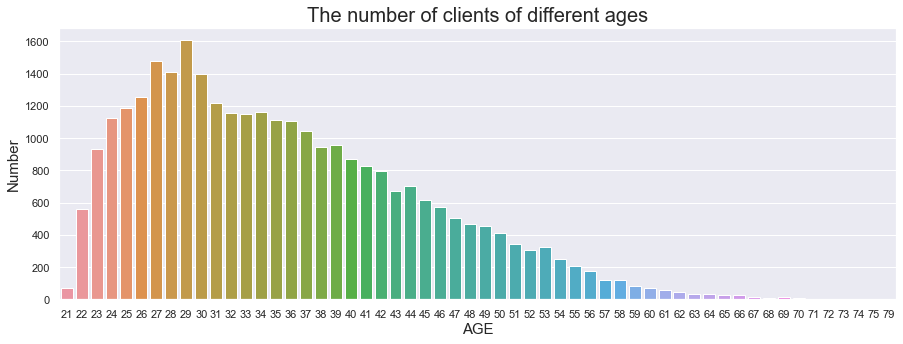

In [12]:
a = defaults_with_bins['AGE']
sns.set(rc={'figure.figsize':(15, 5)})
data_age = sns.countplot(data=defaults_with_bins, x = 'AGE');
data_age.set_title('The number of clients of different ages', fontsize = 20)
data_age.set_xlabel('AGE', fontsize = 15)
data_age.set_ylabel('Number', fontsize = 15)

Text(0.5, 0, 'Age_Categories')

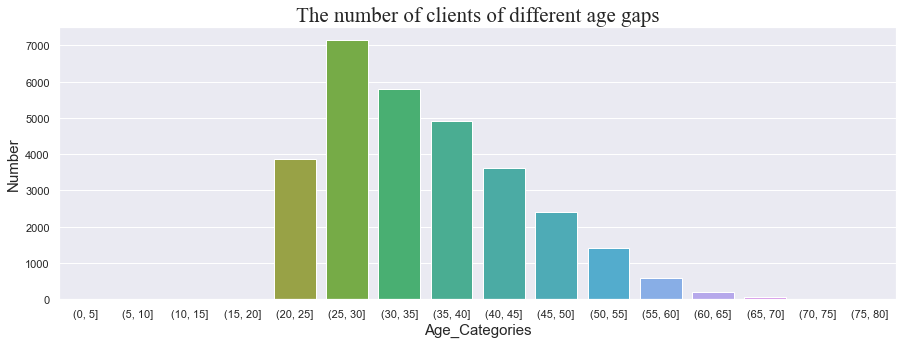

In [13]:
b = defaults_with_bins['AGE_BINS']
sns.set(rc={'figure.figsize':(15, 5)})
data_age_bins = sns.countplot(data=defaults_with_bins, x='AGE_BINS');
data_age_bins.set_title('The number of clients of different age gaps', fontsize = 21, fontname = 'Times New Roman')
data_age_bins.set_ylabel('Number', fontsize = 15)
data_age_bins.set_xlabel('Age_Categories', fontsize = 15)

Thus, clients aged 25 to 30 years most often come to the bank

The categorical variable is convenient to use, as you only need to look at a specific bar on the histogram, rather than manually adding values from several columns, to understand which group of people visits the bank more often.

In [14]:
defaults.loc[defaults['default.payment.next.month'] == 0].shape[0]

23364

In [15]:
defaults.loc[defaults['default.payment.next.month'] == 1].shape[0]

6636

    Share
0  0.7788
1  0.2212


/Users/nikitadvornov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number')

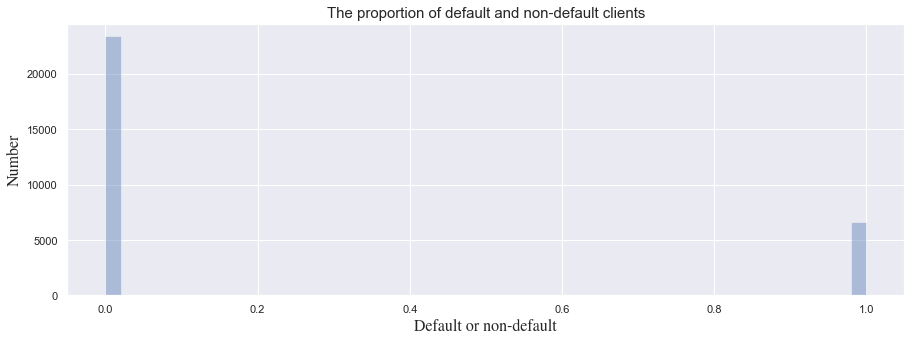

In [16]:
proportions = pd.DataFrame({'Share': [defaults.loc[defaults['default.payment.next.month'] == 0].shape[0] / defaults.shape[0], 
                            defaults.loc[defaults['default.payment.next.month'] == 1].shape[0] / defaults.shape[0]]})
print(proportions)
proportions_graph = sns.distplot(a = defaults, x = defaults['default.payment.next.month'], kde = False)
proportions_graph.set_title('The proportion of default and non-default clients', fontsize = 15)
proportions_graph.set_xlabel('Default or non-default', fontsize = 16, fontname = 'Times')
proportions_graph.set_ylabel('Number', fontsize = 16, fontname = 'Times')

The share of clients with defaults is 0.2212, which is quite a high figure.

Text(0, 0.5, 'Density')

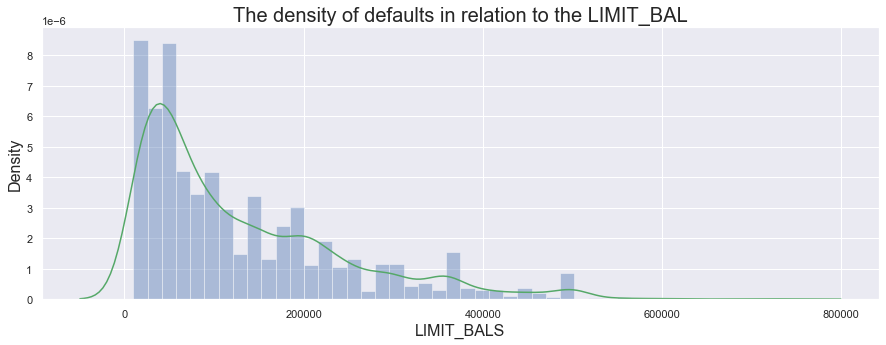

In [17]:
clients_with_default = defaults.loc[defaults['default.payment.next.month'] == 1]
def_ = sns.distplot(a = clients_with_default['LIMIT_BAL'], kde = True, hist = True, kde_kws = {'color': 'g'}, hist_kws={'color': 'b'})
def_.set_title('The density of defaults in relation to the LIMIT_BAL', fontsize = 20)
def_.set_xlabel('LIMIT_BALS', fontsize = 16, fontname = 'Arial')
def_.set_ylabel('Density', fontsize = 16, fontname = 'Arial')

/Users/nikitadvornov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

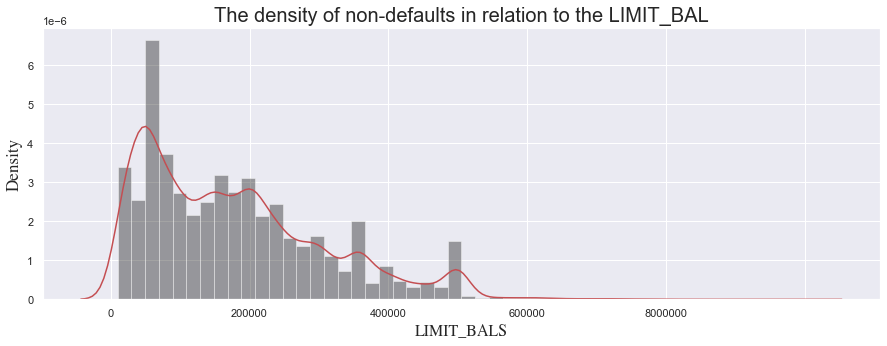

In [18]:
clients_without_default = defaults.loc[defaults['default.payment.next.month'] == 0]
density = sns.distplot(clients_without_default['LIMIT_BAL'], kde = True, hist = True, kde_kws = {'color': 'r'}, hist_kws={'color': 'k'})
density.set_xticklabels([0, '0', '200000', '400000', '600000', '8000000']);
density.set_title('The density of non-defaults in relation to the LIMIT_BAL', fontsize = 20)
density.set_xlabel('LIMIT_BALS', fontsize = 16, fontname = 'Times')
density.set_ylabel('Density', fontsize = 17, fontname = 'Times')

Defaults most often occur with a loan amount of about 500,000 dollars.

It is impossible to say at which loan amount clients without defaults outnumber clients with defaults, as the pattern alternates and is not ordered.

In [19]:
defaults.columns = [column.replace('.', 'a') for column in defaults.columns]
defaults

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultapaymentanextamonth
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [20]:
x = dict(defaults.query('defaultapaymentanextamonth==0')['LIMIT_BAL'].value_counts(sort=False))
y = dict(defaults.query('defaultapaymentanextamonth==1')['LIMIT_BAL'].value_counts(sort=False))
set_1 = set(x.keys())
set_2 = set(y.keys())
only_defaults = set_2 - set_1
not_defaults = set_1 - set_2
print(only_defaults, not_defaults)

{327680.0} {640000.0, 660000.0, 1000000.0, 700000.0, 16000.0, 760000.0, 780000.0, 800000.0, 540000.0, 570000.0, 610000.0, 650000.0, 670000.0, 690000.0, 730000.0, 750000.0}


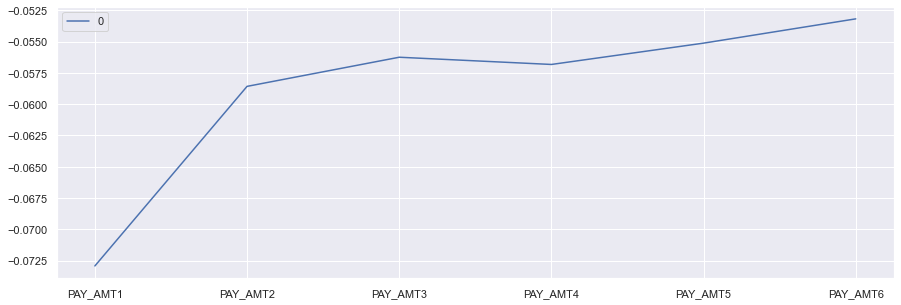

In [21]:
correlation = defaults.corrwith(defaults['defaultapaymentanextamonth']).to_frame()
correlation = correlation['PAY_AMT1':'PAY_AMT6']
correlation.plot()
plt.xticks();

In [22]:
from collections import OrderedDict

dictionary_1 = dict(defaults['LIMIT_BAL'].value_counts())
for key in dictionary_1:
    if key not in only_defaults:
        if key not in not_defaults:
            d = {'ratio': np.round(y[key]/x[key], decimals = 4), 'num_clients':dictionary_1[key]}
    elif key in not_defaults:
        d = {'ratio': 0.0, 'num_clients':dictionary_1[key]}
    elif key in not_defaults:
        d = {'ratio': 1.0, 'num_clients':dictionary_1[key]}
    dictionary_1[key] = d
OrderedDict(sorted(dictionary_1.items(), key=lambda y: y[1]['ratio'], reverse = True))

OrderedDict([(740000.0, {'ratio': 1.0, 'num_clients': 2}),
             (780000.0, {'ratio': 1.0, 'num_clients': 2}),
             (690000.0, {'ratio': 1.0, 'num_clients': 2}),
             (1000000.0, {'ratio': 1.0, 'num_clients': 2}),
             (760000.0, {'ratio': 1.0, 'num_clients': 2}),
             (327680.0, {'ratio': 1.0, 'num_clients': 2}),
             (40000.0, {'ratio': 0.6667, 'num_clients': 230}),
             (10000.0, {'ratio': 0.6655, 'num_clients': 493}),
             (20000.0, {'ratio': 0.5462, 'num_clients': 1976}),
             (30000.0, {'ratio': 0.5451, 'num_clients': 1610}),
             (720000.0, {'ratio': 0.5, 'num_clients': 3}),
             (660000.0, {'ratio': 0.5, 'num_clients': 3}),
             (670000.0, {'ratio': 0.5, 'num_clients': 3}),
             (800000.0, {'ratio': 0.5, 'num_clients': 3}),
             (16000.0, {'ratio': 0.5, 'num_clients': 3}),
             (730000.0, {'ratio': 0.5, 'num_clients': 3}),
             (70000.0, {'ratio': 0.403

The largest share (1) of clients with defaults is for loans of 740,000, 780,000, 690,000, 1,000,000, 760,000, 327,680 dollars. 
We cannot conclude that in general, it is not advisable to approve these amounts for new clients, as the sample size of 2 clients is extremely unrepresentative.